In [0]:
%config IPCompleter.greedy=True

!git clone https://github.com/MultiAgentLearning/playground ~/playground
%cd ~/playground
!pip install -U .

!git clone https://github.com/JaroslavUrbann/Pommerman.git /content/Pommerman
%cd /content/Pommerman

!pip3 install -r requirements.txt

Import error NSDE! You will not be able to render --> Cannot connect to "None"
agent initialized
agent initialized
agent initialized
agent initialized
database items done: 408/250000
database items done: 816/250000
database items done: 1224/250000
database items done: 1632/250000
database items done: 2040/250000
database items done: 2412/250000
database items done: 2820/250000
database items done: 3228/250000
database items done: 3450/250000
database items done: 3858/250000
database items done: 4256/250000
database items done: 4664/250000
database items done: 5072/250000
database items done: 5440/250000
database items done: 5848/250000
database items done: 6256/250000
database items done: 6664/250000
database items done: 7072/250000
database items done: 7480/250000
database items done: 7850/250000
database items done: 8258/250000
database items done: 8666/250000
database items done: 9057/250000
database items done: 9465/250000
database items done: 9873/250000
database items done: 10281

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/content/Pommerman/agents/hako_agent.py", line 35, in start_server
    check_output("java -jar " + self.path, shell=True)
  File "/usr/lib/python3.6/subprocess.py", line 356, in check_output
    **kwargs).stdout
  File "/usr/lib/python3.6/subprocess.py", line 438, in run
    output=stdout, stderr=stderr)
subprocess.CalledProcessError: Command 'java -jar /content/Pommerman/agents/hako/BBMServer25336.jar' returned non-zero exit status 137.

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/content/Pommerman/agents/h

-----------------------------------------------------------------------------
filling db done in: 23773.19958806038
-----------------------------------------------------------------------------
Train on 225000 samples, validate on 25000 samples
Epoch 1/3
225000/225000 [==============================] - 4299s 19ms/sample - loss: 2.4120 - acc: 0.7012 - val_loss: 1.0779 - val_acc: 0.8247
Epoch 2/3
225000/225000 [==============================] - 4259s 19ms/sample - loss: 0.7282 - acc: 0.8581 - val_loss: 0.5252 - val_acc: 0.8841
Epoch 3/3
225000/225000 [==============================] - 4269s 19ms/sample - loss: 0.4839 - acc: 0.8953 - val_loss: 0.4930 - val_acc: 0.8911


W0728 17:47:33.912717 140090829637504 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

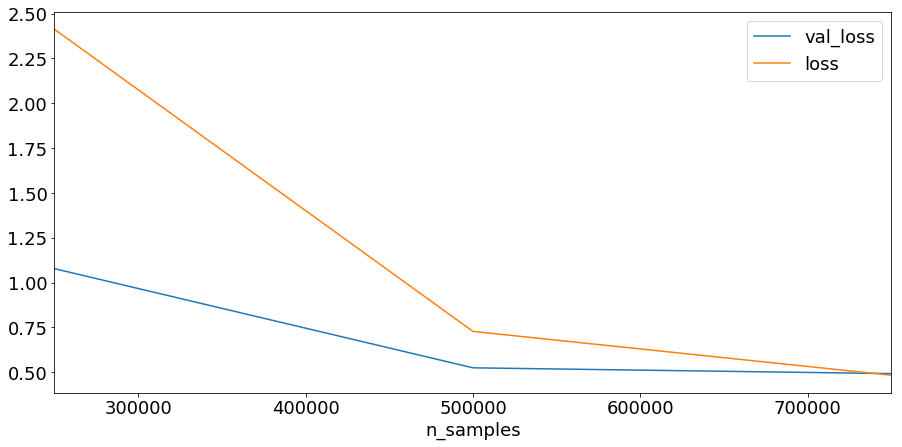

In [2]:
from pretraining.network import Network
from pretraining import game_env, DB
import gdrive_auth


model_id = None
model_name = "N1"
log_id = None
db_size = 250000
n_epochs = 3

drive = None
drive = gdrive_auth.get_drive()

if db_size:
    DB.create_database(db_size=db_size)
    game_env.fill_database()

N = Network(drive=drive)

if model_id:
    N.load_model(model_id=model_id, log_id=log_id)
elif model_name:
    N.init_model(model_name)

if n_epochs:
    N.train_model_on_database(n_epochs=n_epochs)

N.upload_logs()
N.upload_model()
N.plot_csv()
